In [3]:
import pandas as pd
from pathlib import Path
import numpy as np
import json
import os
import re
import matplotlib.pyplot as plt

In [4]:
data_dir = Path.cwd()
projet_file = "projet.json"

## Rouler le modèle

In [5]:
from hsamiplus.hsamibin import hsamibin

In [6]:
s = {}
etats = {}
deltas = {}

In [7]:
%%time
s, etats, deltas = hsamibin(data_dir, projet_file)


CPU times: user 44.7 s, sys: 442 ms, total: 45.1 s
Wall time: 46 s


### Etats

In [9]:
for k in etats.keys():
    print(k)

eau_hydrogrammes
neige_au_sol
fonte
nas_tot
fonte_tot
derniere_neige
gel
nappe
reserve
sol
mh_surf
mh_vol
ratio_MH
mhumide
ratio_qbase
cumdegGel
obj_gel
dernier_gel
reservoir_epaisseur_glace
reservoir_energie_glace
reservoir_superficie
reservoir_superficie_glace
reservoir_superficie_ref
eeg
ratio_bassin
ratio_reservoir
ratio_fixe


In [ ]:
etats['neige_au_sol'][:20]

[np.float64(4.5),
 np.float64(4.547596510923621),
 np.float64(2.9208631103467377),
 np.float64(2.499630408085778),
 np.float64(2.499630408085778),
 np.float64(2.499630408085778),
 np.float64(2.499630408085778),
 np.float64(2.599630408085778),
 np.float64(2.599630408085778),
 np.float64(2.890308881950575),
 np.float64(2.890308881950575),
 np.float64(2.890308881950575),
 np.float64(3.433067297970963),
 np.float64(3.2238758424261706),
 np.float64(3.3238758424261707),
 np.float64(3.423875842426171),
 np.float64(4.023875842426171),
 np.float64(4.423875842426171),
 np.float64(4.423875842426171),
 np.float64(4.6238758424261714)]

In [19]:
etats["sol"][:20]

[[7.514729607296923, nan],
 [7.608458626971791, nan],
 [7.973531319755639, nan],
 [8.22325745668112, nan],
 [8.099549537704013, nan],
 [7.9928121034582995, nan],
 [7.885027708979472, nan],
 [7.75135793544816, nan],
 [7.660443278234617, nan],
 [7.757024507124628, nan],
 [7.642269081374213, nan],
 [7.546583761480832, nan],
 [7.9732024213908, nan],
 [8.17101530792164, nan],
 [8.082171364974972, nan],
 [7.998765280958364, nan],
 [7.908073226687558, nan],
 [7.8215845032164095, nan],
 [7.694500223787029, nan],
 [7.569120462629437, nan]]

In [21]:
etats['eau_hydrogrammes'][:2]

[[[0.006225484974128852, 0.0, 0.00044140787650784785],
  [0.0034214185611731946, 0.0, 0.0002435491522776476],
  [0.0018265555623353706, 0.0, 0.0001305124009288725],
  [0.0009547822876580056, 0.0, 6.850606570265149e-05],
  [0.0004888674141725011, 0.0, 3.524927229894017e-05],
  [0.00024334209143499598, 0.0, 1.766938305378178e-05],
  [0.00011551411845535596, 0.0, 8.473628435456541e-06],
  [4.974090452840551e-05, 0.0, 3.7043805413284066e-06],
  [1.6427362982705647e-05, 0.0, 1.2507371442820306e-06],
  [0.0, 0.0, 0.0]],
 [[0.012882808695421823, 0.0, 0.0004527480040951236],
  [0.007241334788106945, 0.05616690350834658, 0.0002502374710088088],
  [0.003928523519512309, 0.0, 0.00013425784662269818],
  [0.0020855387979123287, 0.0, 7.055294495895344e-05],
  [0.001088470772406163, 0.0, 3.635584954428197e-05],
  [0.000558457359983542, 0.0, 1.826745537137184e-05],
  [0.00028022402421565957, 0.0, 8.800545409041322e-06],
  [0.00013569877731660425, 0.0, 3.887922862158523e-06],
  [6.145332043242664e-05, 

### Sorties

In [11]:
for k in s.keys():
    print(k)

Qtotal
Qbase
Qinter
Qsurf
Qreservoir
Qglace
ETP
ETRtotal
ETRsublim
ETRPsurN
ETRintercept
ETRtranspir
ETRreservoir
ETRmhumide
Qmh
Dates


In [12]:
np.vstack((s['Qtotal'], s['Qbase'], s['Qsurf'])).T.shape

(23376, 3)

In [24]:
Sim = pd.DataFrame(np.vstack((s['Qtotal'], s['Qbase'], s['Qsurf'],
                              s['ETP'], s['ETRtotal'], s['ETRsublim'], s['ETRtranspir'])).T,
                   index=pd.DatetimeIndex([pd.Timestamp(*dt) for dt in s['Dates']]),
                   columns=['Qtotal', 'Qbase', 'Qsurf', 'ETP', 'ETRtotal',
                            'ETRsublim', 'ETRtranspir'])

<Axes: >

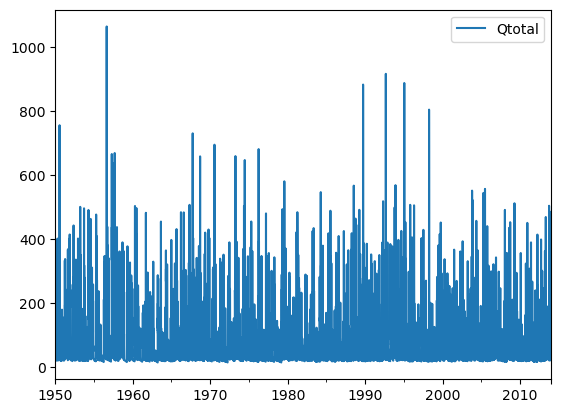

In [14]:
Sim[['Qtotal']].plot()

Text(0, 0.5, '[m$^3$/s]')

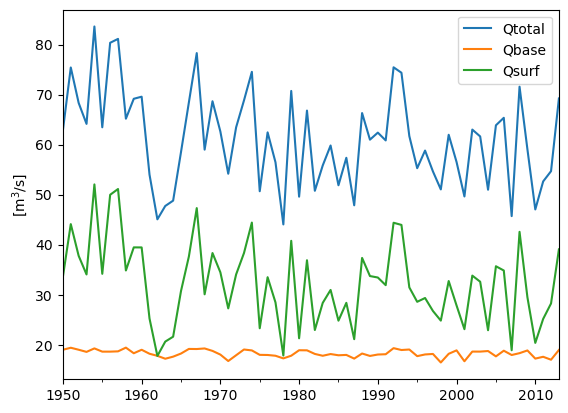

In [15]:
Sim[['Qtotal', 'Qbase', 'Qsurf']].resample('YE').apply('mean').plot()
plt.ylabel('[m$^3$/s]')

Text(0, 0.5, '[cm]')

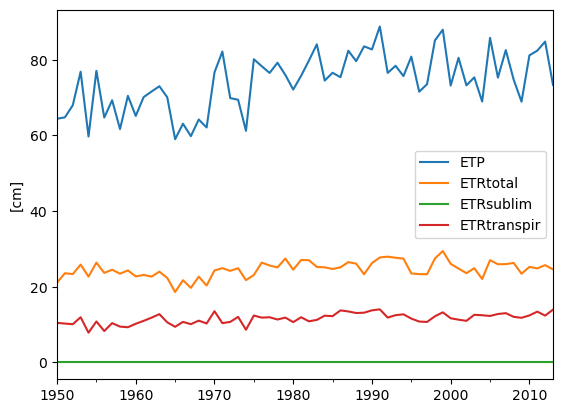

In [26]:
Sim[['ETP', 'ETRtotal', 'ETRsublim', 'ETRtranspir']].resample('YE').apply('sum').plot()
plt.ylabel('[cm]')

Text(0, 0.5, '[cm]')

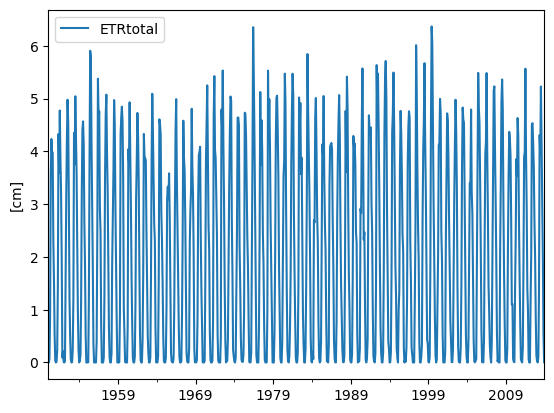

In [16]:
Sim[['ETRtotal']].resample('ME').apply('sum').plot()
plt.ylabel('[cm]')

<Axes: >

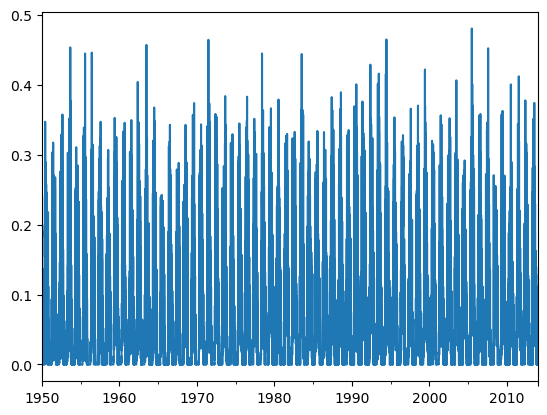

In [17]:
Sim['ETRtotal'].plot()